# More Beats for This!: Reproducing Beat this! paper results and fail case analysis

## install all the requirements/data for reproducing results

In [ ]:
# download the whole repo we need the launch scripts
!git clone https://github.com/CPJKU/beat_this.git

Cloning into 'beat_this'...
remote: Enumerating objects: 1194, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1194 (delta 165), reused 182 (delta 150), pack-reused 986 (from 1)
Receiving objects: 100% (1194/1194), 10.43 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (812/812), done.


In [ ]:
!mv beat_this/* .
!rm -rf beat_this

mv: cannot move 'beat_this/beat_this' to './beat_this': Directory not empty


In [ ]:
# install requirements for computing eval metrics
!pip install pytorch_lightning pandas
!pip install https://github.com/mir-evaluation/mir_eval/archive/main.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [ ]:
# install the beat_this package
!pip install https://github.com/CPJKU/beat_this/archive/main.zip

     - 5.0 MB 2.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for beat-this: filename=beat_this-0.1-py3-none-any.whl size=39306 sha256=08ff86cf1e1699700925faaf807993e2581c0db957a13f8b84c22b80fc001d4d
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwbl39us/wheels/a1/1c/be/c2a2e75224d5cf5bc9cd42e2abf51275b69ec02974b45a38f1
Successfully built beat-this


In [1]:
# get the data
!mkdir -p data
!git clone https://github.com/CPJKU/beat_this_annotations data/annotations

Cloning into 'data/annotations'...
remote: Enumerating objects: 5506, done.
remote: Counting objects: 100% (5506/5506), done.
remote: Compressing objects: 100% (5380/5380), done.
remote: Total 5506 (delta 115), reused 5489 (delta 106), pack-reused 0 (from 0)
Receiving objects: 100% (5506/5506), 5.59 MiB | 2.78 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
import os

# Download the dataset
!wget https://zenodo.org/records/13922116/files/gtzan.zip?download=1 -O gtzan.zip

# Create the directory structure
!mkdir -p data/audio/spectrograms

# Extract the zip file
!unzip gtzan.zip -d data/audio/spectrograms

# Remove the zip file
!rm gtzan.zip

--2025-03-14 12:03:04--  https://zenodo.org/records/13922116/files/gtzan.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306944985 (293M) [application/octet-stream]
Saving to: ‘gtzan.zip’

gtzan.zip           100%[===================>] 292.72M  11.3MB/s    in 27s     

2025-03-14 12:03:32 (10.7 MB/s) - ‘gtzan.zip’ saved [306944985/306944985]

Archive:  gtzan.zip
  inflating: data/audio/spectrograms/gtzan.npz  


## Run Beat this with modified `compute_paper_metrics.py`

In [ ]:
# Download our file from GitHub and save it to the launch_scripts directory
!wget https://raw.githubusercontent.com/smilo7/more-beats-for-this/main/modified-beat-this-scripts/compute_paper_metrics_modified.py -O launch_scripts/compute_paper_metrics_modified.py


### for final model

In [ ]:
!python launch_scripts/compute_paper_metrics_modified.py --models final0 final1 final2 --datasplit test

Seed set to 0
Creating datamodule
Skipping gtzan/gtzan_jazz_00003 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00010 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00009 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00020 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00014 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00018 because it has 1 columns but downbeat is supposed to be there.
Test set: 993 items from: gtzan
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2,

### for small model

In [ ]:
!python launch_scripts/compute_paper_metrics_modified.py --models small0 small1 small2 --datasplit test

Seed set to 0
Downloading: "https://cloud.cp.jku.at/index.php/s/7ik4RrBKTS273gp/download?path=%2F&files=small0.ckpt" to /root/.cache/torch/hub/checkpoints/beat_this-small0.ckpt
100% 8.06M/8.06M [00:02<00:00, 3.89MB/s]
Creating datamodule
Skipping gtzan/gtzan_jazz_00003 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00010 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00018 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00009 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00014 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00020 because it has 1 columns but downbeat is supposed to be there.
Test set: 993 items from: gtzan
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Fail case analysis

### plot the top worst tracks by f-measure

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logged metrics
log_file = "file_metrics_log.csv"
df = pd.read_csv(log_file)
df.head()

worst_metric = "F-measure_beat"

# Sort by worst metric (highest loss)
df_sorted = df.sort_values(by=worst_metric, ascending=True)

# Select the top 10 worst-performing tracks
top_n = 100
df_worst = df_sorted.head(top_n)

# Print the table of worst-performing tracks
df_worst

,Piece,Dataset,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat
36,gtzan/gtzan_blues_00036/track.npy,gtzan,0.000000,0.265311,0.019608,0.686275,0.000000,0.000643,1.000000,1.000000
595,gtzan/gtzan_metal_00001/track.npy,gtzan,0.000000,0.477354,0.000000,0.984615,0.000000,0.000011,0.941176,0.941176
30,gtzan/gtzan_blues_00030/track.npy,gtzan,0.000000,0.177261,0.000000,0.826087,0.000000,0.000072,1.000000,1.000000
127,gtzan/gtzan_classical_00027/track.npy,gtzan,0.000000,0.232456,0.000000,0.700000,0.000000,0.000103,0.166667,0.166667
598,gtzan/gtzan_metal_00004/track.npy,gtzan,0.066116,0.177939,0.015625,0.515625,0.000000,0.010143,0.450000,0.450000
...,...,...,...,...,...,...,...,...,...,...
19,gtzan/gtzan_blues_00019/track.npy,gtzan,0.606452,0.653783,0.000000,0.846154,0.204082,0.215770,0.000000,0.055556
504,gtzan/gtzan_jazz_00005/track.npy,gtzan,0.607407,0.670321,0.000000,0.846154,0.270270,0.273406,0.000000,0.000000
689,gtzan/gtzan_metal_00095/track.npy,gtzan,0.610526,0.651721,0.000000,0.904762,0.583333,0.643079,0.000000,0.937500
33,gtzan/gtzan_blues_00033/track.npy,gtzan,0.612245,0.589560,0.000000,0.969697,0.666667,0.577451,0.312500,0.454545


### get the GTZAN audio files for later

In [ ]:
# mir data link is down

!pip install mirdata

import mirdata
# intialize the gtzan dataset
gtzan = mirdata.initialize('gtzan_genre', data_home='/content/mir_data')

# download it (only once)
gtzan.download(partial_download=['all']) # comment out this line after you have downloaded the data

In [ ]:
gtzan.download(partial_download=['all']) # comment out this line after you have downloaded the data

In [ ]:
import shutil
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

# Define the target folder path
target_folder = "gtzan_audio"

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Move the downloaded files to the target folder
for filename in os.listdir(path):
    source_path = os.path.join(path, filename)
    destination_path = os.path.join(target_folder, filename)

    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
    elif os.path.isdir(source_path):
        shutil.move(source_path, destination_path)

print(f"Files moved to: {target_folder}")


### estimate the time signature of worst tracks from the .beats files

In [ ]:
import numpy as np
from collections import Counter

def detect_time_signature(beats_file):
    # Load beats data
    beat_times, beat_numbers = np.loadtxt(beats_file, unpack=True)

    # Find repeating cycle pattern
    diffs = np.diff(beat_numbers)  # Differences between consecutive beats
    cycle_lengths = []

    current_cycle = []
    for i in range(len(diffs)):
        current_cycle.append(beat_numbers[i])
        if diffs[i] < 0:  # Detect restart of the beat cycle
            cycle_lengths.append(len(current_cycle))
            current_cycle = []

    # Count occurrences of cycle lengths
    if cycle_lengths:
        most_common_cycle = Counter(cycle_lengths).most_common(1)[0][0]
        return f"{most_common_cycle}/4"
    else:
        return "Unable to determine time signature."

# Usage example
beats_file = "/content/data/annotations/gtzan/annotations/beats/gtzan_blues_00000.beats"
print(detect_time_signature(beats_file))


Detected Time Signature: 4/4


# Analysis of time signatures in the training set

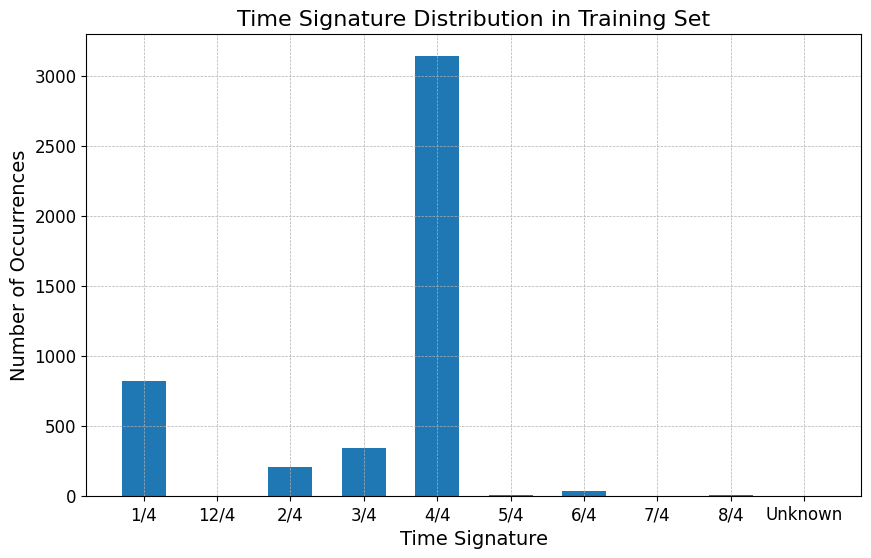

Time Signature: 4/4, Percentage: 68.95%
Time Signature: 2/4, Percentage: 4.50%
Time Signature: Unknown, Percentage: 0.02%
Time Signature: 3/4, Percentage: 7.53%
Time Signature: 6/4, Percentage: 0.70%
Time Signature: 1/4, Percentage: 18.02%
Time Signature: 8/4, Percentage: 0.18%
Time Signature: 5/4, Percentage: 0.07%
Time Signature: 12/4, Percentage: 0.02%
Time Signature: 7/4, Percentage: 0.02%


In [8]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def parse_beats_file(filepath):
    """Parse a .beats file to extract beat times and optionally beat numbers."""
    beats = []
    beat_numbers = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                time, beat = float(parts[0]), int(parts[1])
                beat_numbers.append(beat)
            else:
                time = float(parts[0])
            beats.append(time)
    return beats, beat_numbers if beat_numbers else None

def infer_time_signature(beats, beat_numbers):
    """Determine the time signature(s) based on beat positions and numbers."""
    if beat_numbers:
        # Detect repeating bar lengths
        bar_lengths = np.diff([i for i, b in enumerate(beat_numbers) if b == 1])
        if len(bar_lengths) > 0:
            common_bar_length = Counter(bar_lengths).most_common(1)
            if common_bar_length:
                return f"{common_bar_length[0][0]}/4"
    
    # Fallback: Estimate from beat spacing if no downbeats are given
    if len(beats) < 2:
        return "Unknown"  # Not enough data to infer time signature
    
    diffs = np.diff(beats)
    avg_beat_interval = np.median(diffs) if len(diffs) > 0 else None
    
    if avg_beat_interval is None or avg_beat_interval == 0:
        return "Unknown"
    
    # Check periodic patterns in beat intervals
    intervals = np.round(diffs / avg_beat_interval).astype(int)
    
    if len(intervals) == 0:
        return "Unknown"

    common_pattern = Counter(intervals).most_common(1)
    if not common_pattern:
        return "Unknown"

    return f"{common_pattern[0][0]}/4"


def process_annotations(data_dir, skip_folders=[]):
    """Process all beat annotation files and return a dictionary of time signatures."""
    time_signatures = defaultdict(list)
    
    for root, dirs, files in os.walk(data_dir):
        if any(skip in root for skip in skip_folders):
            continue
        
        dataset = os.path.basename(root)
        for file in files:
            if file.endswith(".beats"):
                filepath = os.path.join(root, file)
                beats, beat_numbers = parse_beats_file(filepath)
                ts = infer_time_signature(beats, beat_numbers)
                time_signatures[ts].append(dataset)
    
    return time_signatures

def plot_time_signature_distribution_frequency(time_signatures):
    """Plot a bar chart of time signature distribution across datasets."""
    counts = defaultdict(Counter)
    
    for ts, datasets in time_signatures.items():
        counts[ts] = Counter(datasets)
    
    time_sigs = sorted(counts.keys())
    datasets = sorted(set(d for c in counts.values() for d in c))
    
    width = 0.6
    fig, ax = plt.subplots()
    bottom = np.zeros(len(time_sigs))
    
    for dataset in datasets:
        values = [counts[ts][dataset] for ts in time_sigs]
        ax.bar(time_sigs, values, width, label=dataset, bottom=bottom)
        bottom += np.array(values)
    
    ax.set_xlabel("Time Signature")
    ax.set_ylabel("Number of Occurrences")
    ax.set_title("Time Signature Distribution by Dataset")
    ax.legend()
    plt.show()

def plot_time_signature_distribution_frequency(time_signatures, output_file='time_signature_distribution_train_set.pdf'):
    """Plot a bar chart of time signature distribution across datasets."""
    counts = defaultdict(Counter)
    
    for ts, datasets in time_signatures.items():
        counts[ts] = Counter(datasets)
    
    time_sigs = sorted(counts.keys())
    datasets = sorted(set(d for c in counts.values() for d in c))
    
    width = 0.6
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
    bottom = np.zeros(len(time_sigs))
    
    for dataset in datasets:
        values = [counts[ts][dataset] for ts in time_sigs]
        ax.bar(time_sigs, values, width, label=dataset, bottom=bottom)
        bottom += np.array(values)
    
    ax.set_xlabel("Time Signature", fontsize=14)
    ax.set_ylabel("Number of Occurrences", fontsize=14)
    ax.set_title("Time Signature Distribution in Training Set", fontsize=16)
    # ax.legend(title="Dataset")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Save the figure
    plt.savefig(output_file, format='pdf', dpi=300, bbox_inches='tight')
    plt.show()

def print_percentages_of_timesignatures(time_signatures):
    # Calculate the total number of time signatures
    total_time_signatures = sum(len(v) for v in time_signatures.values())

    # Calculate the percentage of each time signature
    time_signature_percentages = {k: (len(v) / total_time_signatures) * 100 for k, v in time_signatures.items()}

    # Print the percentages
    for ts, percentage in time_signature_percentages.items():
        print(f"Time Signature: {ts}, Percentage: {percentage:.2f}%")


# Example usage
# skip_folders = ["asap", "ballroom", "beatles", "candombe", "filosax", "groove_midi", "guitarset", "hainsworth", "harmonix", "hjdb", "jaah", "rwc", "simac", "smc", "tapcorrect"]
skip_folders = ["gtzan"]
data_dir = "data/annotations"
time_signatures = process_annotations(data_dir, skip_folders)
plot_time_signature_distribution_frequency(time_signatures)
print_percentages_of_timesignatures(time_signatures)


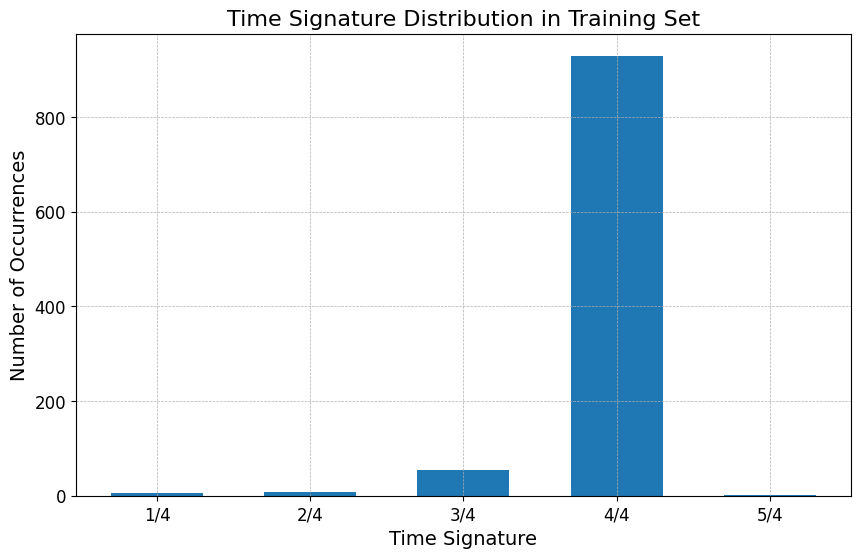

Time Signature: 4/4, Percentage: 93.09%
Time Signature: 3/4, Percentage: 5.41%
Time Signature: 1/4, Percentage: 0.60%
Time Signature: 2/4, Percentage: 0.70%
Time Signature: 5/4, Percentage: 0.20%


In [9]:
skip_folders = ["asap", "ballroom", "beatles", "candombe", "filosax", "groove_midi", "guitarset", "hainsworth", "harmonix", "hjdb", "jaah", "rwc", "simac", "smc", "tapcorrect"]
data_dir = "data/annotations"
time_signatures = process_annotations(data_dir, skip_folders)
plot_time_signature_distribution_frequency(time_signatures, output_file='time_signature_distribution_test_set.pdf')
print_percentages_of_timesignatures(time_signatures)

In [5]:
# Calculate the total number of time signatures
total_time_signatures = sum(len(v) for v in time_signatures.values())

# Calculate the percentage of each time signature
time_signature_percentages = {k: (len(v) / total_time_signatures) * 100 for k, v in time_signatures.items()}

# Print the percentages
for ts, percentage in time_signature_percentages.items():
  print(f"Time Signature: {ts}, Percentage: {percentage:.2f}%")

Time Signature: 4/4, Percentage: 93.09%
Time Signature: 3/4, Percentage: 5.41%
Time Signature: 1/4, Percentage: 0.60%
Time Signature: 2/4, Percentage: 0.70%
Time Signature: 5/4, Percentage: 0.20%


In [ ]:
for index, row in df_worst.iterrows():
  piece = row["Piece"]
  parts = piece.split('/')
  piece_name = parts[1]
  path = f"/content/data/annotations/gtzan/annotations/beats/{piece_name}.beats"
  # print(detect_time_signature(path))
  result = analyze_beats_file(path)
  print(piece_name, result)

gtzan_blues_00036 {'4/4': {'start': 0.067, 'end': 29.83}}
gtzan_metal_00001 {'4/4': {'start': 0.028, 'end': 29.662}}
gtzan_blues_00030 {'4/4': {'start': 0.484, 'end': 29.916}}
gtzan_classical_00027 {'4/4': {'start': 0.829, 'end': 29.877}}
gtzan_metal_00004 {'4/4': {'start': 0.141, 'end': 29.475}}
gtzan_classical_00039 {'4/4': {'start': 0.515, 'end': 29.755}}
gtzan_jazz_00030 {'4/4': {'start': 0.15, 'end': 29.97}}
gtzan_classical_00041 {'4/4': {'start': 0.097, 'end': 29.72}}
gtzan_classical_00032 {'3/4': {'start': 0.411, 'end': 29.174}}
gtzan_disco_00047 {'4/4': {'start': 0.097, 'end': 29.854}}
gtzan_classical_00034 {'4/4': {'start': 1.16, 'end': 29.65}}
gtzan_pop_00053 {'4/4': {'start': 0.039, 'end': 29.877}}
gtzan_pop_00011 {'4/4': {'start': 0.335, 'end': 29.865}}
gtzan_classical_00040 {'4/4': {'start': 0.271, 'end': 29.412}}
gtzan_classical_00047 {'4/4': {'start': 0.126, 'end': 27.834}}
gtzan_classical_00033 {'4/4': {'start': 0.306, 'end': 29.674}}
gtzan_rock_00020 {'4/4': {'start': 

# Using fine tuned models

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logged metrics
log_file = "../beat-this-results-on-test/file_metrics_log_finetune_timestretch_aug.csv"
df = pd.read_csv(log_file)
df.head()

worst_metric = "F-measure_beat"

# Sort by worst metric (highest loss)
df_sorted = df.sort_values(by=worst_metric, ascending=True)

# Select the top 10 worst-performing tracks
top_n = 100
df_worst = df_sorted.head(top_n)

# Print the table of worst-performing tracks
df_worst

,Piece,Dataset,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat
19,gtzan/gtzan_blues_00019/track.npy,gtzan,0.000000,3.926909e-01,0.000000,0.923077,0.000000,4.577646e-05,0.529412,0.529412
141,gtzan/gtzan_classical_00041/track.npy,gtzan,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.245350e-02,0.000000,0.000000
136,gtzan/gtzan_classical_00036/track.npy,gtzan,0.000000,0.000000e+00,0.000000,0.000000,0.000000,9.116227e-03,0.000000,0.142857
150,gtzan/gtzan_classical_00050/track.npy,gtzan,0.000000,0.000000e+00,0.000000,0.000000,0.222222,3.063835e-01,0.000000,0.000000
147,gtzan/gtzan_classical_00047/track.npy,gtzan,0.000000,2.050386e-07,0.000000,0.000000,0.000000,2.862658e-08,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...
447,gtzan/gtzan_hiphop_00047/track.npy,gtzan,0.440860,4.181942e-01,0.000000,0.131034,0.476190,4.318912e-01,0.000000,0.468750
603,gtzan/gtzan_metal_00009/track.npy,gtzan,0.442308,3.567305e-01,0.025000,0.056250,0.117647,9.573043e-02,0.045455,0.045455
935,gtzan/gtzan_rock_00042/track.npy,gtzan,0.444444,4.420691e-01,0.000000,0.333333,0.074074,8.694470e-02,0.052632,0.052632
946,gtzan/gtzan_rock_00053/track.npy,gtzan,0.448430,4.361168e-01,0.000000,0.069364,0.272727,3.305904e-01,0.031250,0.281250


In [23]:
import pandas as pd

# Load the two CSV files
file1 = "../beat-this-results-on-test/file_metrics_log_finetune_timestretch_aug.csv"
file2 = "../beat-this-results-on-test/final-model-track-metrics.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Ensure both dataframes have a common column
common_column = "Piece"  # Adjust if needed
metric = "F-measure_beat"

# Merge the dataframes to compare all tracks
df_merged = df1[[common_column, metric]].merge(
    df2[[common_column, metric]], 
    on=common_column, 
    suffixes=("_finetune", "_original")
)

# Extract genre from the "Piece" column
df_merged["Genre"] = df_merged["Piece"].str.extract(r'gtzan/gtzan_(\w+)_\d+/track.npy')

# Calculate improvement
df_merged["improvement"] = df_merged[f"{metric}_finetune"] - df_merged[f"{metric}_original"]

# Group by genre
df_genre = df_merged.groupby("Genre").agg(
    num_tracks=("improvement", "count"),
    avg_improvement=("improvement", "mean"),
    num_improved=("improvement", lambda x: (x > 0).sum()),
    num_worsened=("improvement", lambda x: (x < 0).sum())
).reset_index()

# Calculate percentage of tracks that improved
df_genre["percent_improved"] = (df_genre["num_improved"] / df_genre["num_tracks"]) * 100

# Sort by avg improvement
df_genre = df_genre.sort_values(by="avg_improvement", ascending=False)

# Display results
print(df_genre)

# Optionally, save to CSV
# df_genre.to_csv("genre_analysis.csv", index=False)


       Genre  num_tracks  avg_improvement  num_improved  num_worsened  \
0      blues         100         0.008612            29            33   
8     reggae          99        -0.038369            20            52   
3      disco         100        -0.057454             6            55   
5       jazz          94        -0.069170            16            62   
2    country         100        -0.091203            13            63   
6      metal         100        -0.092627            17            58   
9       rock         100        -0.093263            13            48   
1  classical         100        -0.096948            32            66   
4     hiphop         100        -0.133141             3            71   
7        pop         100        -0.275959             2            94   

   percent_improved  
0         29.000000  
8         20.202020  
3          6.000000  
5         17.021277  
2         13.000000  
6         17.000000  
9         13.000000  
1         32.000000 

In [22]:
## OUt of the improved tracks which genre improved the most

import pandas as pd

# Assuming df_improved is already created from previous steps

# Extract genre from "Piece" column
df_improved["Genre"] = df_improved["Piece"].str.extract(r'gtzan/gtzan_(\w+)_\d+/track.npy')

# Group by genre and compute the mean improvement
df_genre = df_improved.groupby("Genre")["improvement"].agg(["count", "mean"]).reset_index()

# Rename columns for clarity
df_genre.rename(columns={"count": "num_tracks", "mean": "avg_improvement"}, inplace=True)

# Sort by average improvement
df_genre = df_genre.sort_values(by="avg_improvement", ascending=False)

# Display results
print(df_genre)
df_genre

# Optionally, save to CSV
# df_genre.to_csv("genre_improvements.csv", index=False)


       Genre  num_tracks  avg_improvement
8     reggae          20         0.149817
6      metal          17         0.147773
0      blues          29         0.136742
3      disco           6         0.136492
9       rock          13         0.131843
5       jazz          16         0.131351
1  classical          32         0.113069
4     hiphop           3         0.097130
2    country          13         0.058330
7        pop           2         0.049911


,Genre,num_tracks,avg_improvement
8,reggae,20,0.149817
6,metal,17,0.147773
0,blues,29,0.136742
3,disco,6,0.136492
9,rock,13,0.131843
5,jazz,16,0.131351
1,classical,32,0.113069
4,hiphop,3,0.097130
2,country,13,0.058330
7,pop,2,0.049911


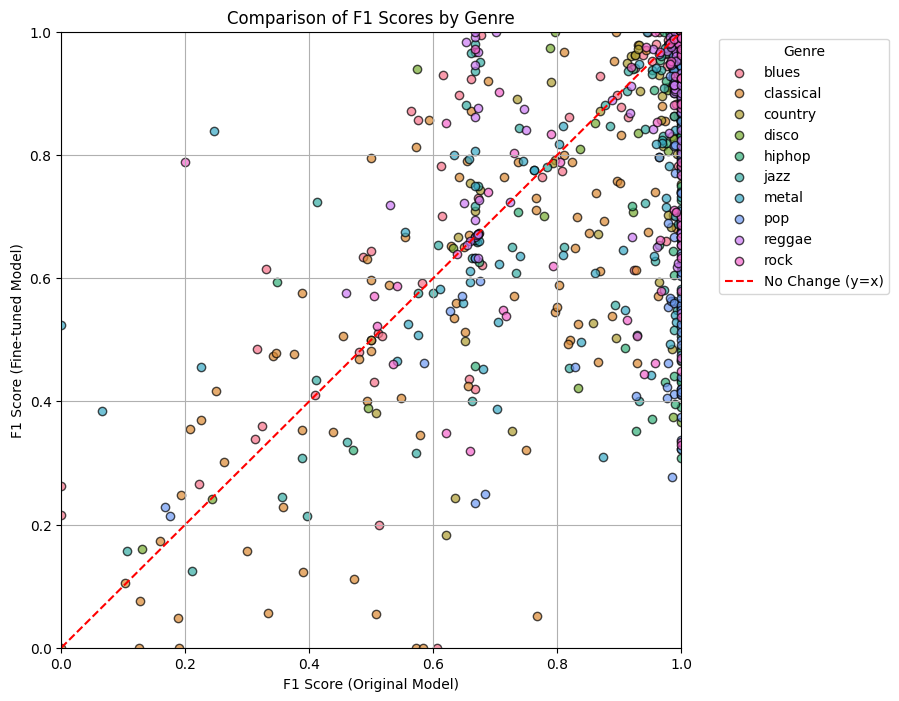

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Load the data
file1 = "../beat-this-results-on-test/file_metrics_log_finetune_timestretch_aug.csv"
file2 = "../beat-this-results-on-test/final-model-track-metrics.csv"

df1 = pd.read_csv(file1)
df2 = pd.read_csv(file2)

# Common column and metric
common_column = "Piece"
metric = "F-measure_beat"

# Merge all tracks
df_merged = df1[[common_column, metric]].merge(
    df2[[common_column, metric]], 
    on=common_column, 
    suffixes=("_finetune", "_original")
)

# Extract genre from 'Piece' (assuming structure like 'gtzan/gtzan_metal_00019/track.npy')
df_merged["Genre"] = df_merged[common_column].apply(lambda x: x.split('/')[1].split('_')[1] if '/' in x else "Unknown")

# Set up color palette
genres = df_merged["Genre"].unique()
palette = sns.color_palette("husl", len(genres))  # Use a distinct color for each genre
genre_colors = {genre: palette[i] for i, genre in enumerate(genres)}

# Scatter plot with genre-based coloring
plt.figure(figsize=(8, 8))
for genre, color in genre_colors.items():
    subset = df_merged[df_merged["Genre"] == genre]
    plt.scatter(
        subset[f"{metric}_original"], subset[f"{metric}_finetune"], 
        alpha=0.7, edgecolors="k", label=genre, color=color
    )

# Add a reference line (y = x)
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="No Change (y=x)")

# Labels and title
plt.xlabel("F1 Score (Original Model)")
plt.ylabel("F1 Score (Fine-tuned Model)")
plt.title("Comparison of F1 Scores by Genre")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Show the plot
plt.show()


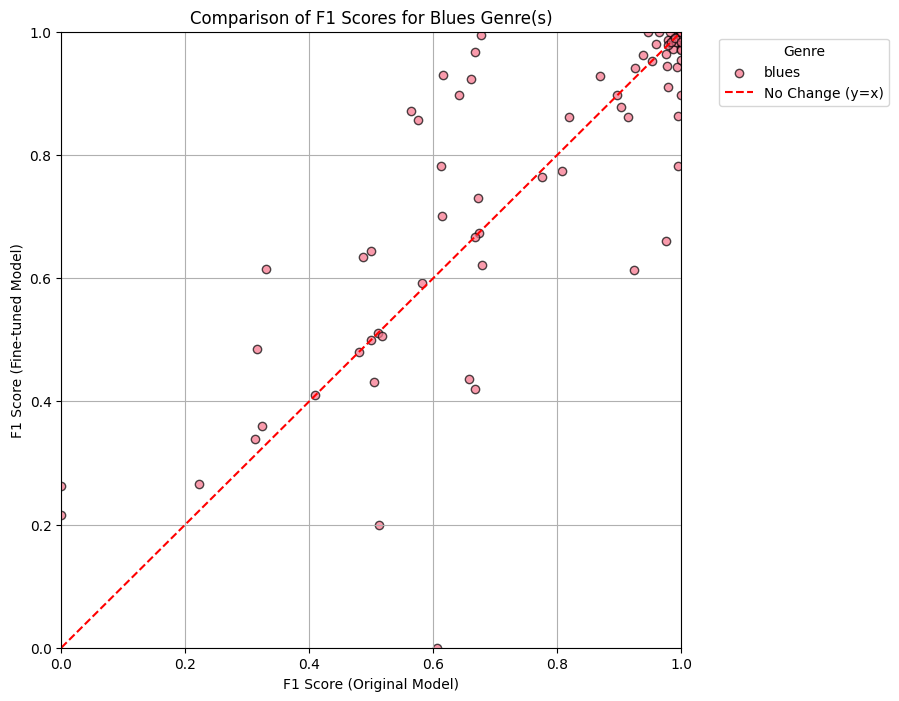

Total tracks in selected genres: 100
Tracks improved after fine-tuning: 29 (29.00%)
Tracks stayed the same: 38 (38.00%)
Tracks worsened after fine-tuning: 33 (33.00%)


In [32]:
# Define which genres to plot
selected_genres = ["blues"]  # Modify this list to include more genres

# Filter the dataframe
df_filtered = df_merged[df_merged["Genre"].isin(selected_genres)]

# Count improvements, no change, and worsened scores
num_improved = (df_filtered[f"{metric}_finetune"] > df_filtered[f"{metric}_original"]).sum()
num_worse = (df_filtered[f"{metric}_finetune"] < df_filtered[f"{metric}_original"]).sum()
num_same = (df_filtered[f"{metric}_finetune"] == df_filtered[f"{metric}_original"]).sum()
num_total = len(df_filtered)

# Calculate percentages
percent_improved = (num_improved / num_total) * 100 if num_total > 0 else 0
percent_worse = (num_worse / num_total) * 100 if num_total > 0 else 0
percent_same = (num_same / num_total) * 100 if num_total > 0 else 0

# Scatter plot with genre-based coloring (only for selected genres)
plt.figure(figsize=(8, 8))
for genre in selected_genres:
    subset = df_filtered[df_filtered["Genre"] == genre]
    plt.scatter(
        subset[f"{metric}_original"], subset[f"{metric}_finetune"], 
        alpha=0.7, edgecolors="k", label=genre, color=genre_colors[genre]
    )

# Add a reference line (y = x)
plt.plot([0, 1], [0, 1], linestyle="--", color="red", label="No Change (y=x)")

# Labels and title
plt.xlabel("F1 Score (Original Model)")
plt.ylabel("F1 Score (Fine-tuned Model)")
plt.title(f"Comparison of F1 Scores for {', '.join(selected_genres).title()} Genre(s)")
plt.legend(title="Genre", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.grid(True)
plt.xlim(0, 1)
plt.ylim(0, 1)

# Show the plot
plt.show()

# Print improvement stats
print(f"Total tracks in selected genres: {num_total}")
print(f"Tracks improved after fine-tuning: {num_improved} ({percent_improved:.2f}%)")
print(f"Tracks stayed the same: {num_same} ({percent_same:.2f}%)")
print(f"Tracks worsened after fine-tuning: {num_worse} ({percent_worse:.2f}%)")
